# Read spatial omics

In [1]:
import SOAPy_st as sp
import pandas as pd

## Read Visium

we used 10X Visium data of mouse dorsolateral prefrontal cortex (DLPFC, 151676) as an example to read the 10X Visium data. To prepare raw data, follow these steps:

1.Raw data file could be download from https://research.libd.org/globus/. 

2.Click *jhpce#HumanPilot10x* and *151676* in turn.

3.Download *151676_raw_feature_bc_matrix.h5*, *tissue_hires_image.png*, *tissue_lowres_image.png*, *tissue_positions_list.txt* and *scalefactors_json.json*.

4.Rename *tissue_positions_list.txt* to *tissue_positions_list.csv*.

5.Assemble the folders as *151676/151676_raw_feature_bc_matrix.h5* , *151676/spatial/tissue_hires_image.png*,  *151676/spatial/tissue_lowres_image.png*, *151676/spatial/tissue_positions_list.csv* and *151676/spatial/scalefactors_json.json*.

In [2]:
adata_visium = sp.pp.read_visium2adata(
    path = './151676/',
    count_file = '151676_raw_feature_bc_matrix.h5'
)

/home/wangheqi/anaconda3/envs/SpatialOmics/lib/python3.9/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
adata_visium

AnnData object with n_obs × n_vars = 4992 × 33538
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

## Read GeoMx DSP

Read spatial transcriptomics data of NanoString GeoMx DSP. Mouse embryonic development samples are used as examples.

Download [Count Results](https://external-soa-downloads-p-1.s3.us-west-2.amazonaws.com/mu_dev_count_results.tar.gz) and [E13 Images](https://external-soa-downloads-p-1.s3.us-west-2.amazonaws.com/mu_dev_E13_image_files.tar.gz) files from https://nanostring.com/products/geomx-digital-spatial-profiler/spatial-organ-atlas/mouse-development/ .


In [4]:
adata_dsp = sp.pp.read_dsp2adata(
    # The path of 'Images' files 
    xml_file={
        # Using the xml file for two samples as an example, 
        # you can add key-value pairs to the dictionary if you need information about sample points for more samples.
        'mu_dev_E13_006': './nanostring_growth/mu_dev_E13_006.ome.xml',
        'mu_dev_E13_011': './nanostring_growth/mu_dev_E13_011.ome.xml'
    },
    # The path of Count Results
    information_file='./nanostring_growth/Export4_NormalizationQ3.xlsx',
)

In [5]:
adata_dsp.obs.head()

,SlideName,ScanLabel,ROILabel,SegmentLabel,QCFlags,AOISurfaceArea,AOINucleiCount,ROICoordinateX,ROICoordinateY,RawReads,...,Timepoint,ROIID,SegmentID,ScanWidth,ScanHeight,ScanOffsetX,ScanOffsetY,LOQ (Mouse NGS Whole Transcriptome Atlas RNA),NormalizationFactor,ExpressionFilteringThreshold (Mouse NGS Whole Transcriptome Atlas RNA)
SegmentDisplayName,,,,,,,,,,,,,,,,,,,,,
mu_dev_E9_001 | 001 | Full ROI,mu_dev_E9_001,mu_dev_E9_001,1,Full ROI,Low Negative Probe Count for Probe Kit Mouse N...,47287.021916,392,16573,18896,4259786,...,E9,c73163bc-f107-498f-bd40-bbcab9a48993,f057dc6e-68ce-441d-a816-58802fc38258,16904.210938,20578.818359,7932,6094,16.252453,0.536152,16.252453
mu_dev_E9_001 | 002 | Full ROI,mu_dev_E9_001,mu_dev_E9_001,2,Full ROI,Low Negative Probe Count for Probe Kit Mouse N...,41175.373907,340,16485,19752,4725639,...,E9,be667b65-38c0-49c4-af51-845ffd8a7a85,09985ba0-449c-4b1a-9c8f-9327991df8fa,16904.210938,20578.818359,7932,6094,17.745085,0.496225,17.745085
mu_dev_E9_001 | 003 | Full ROI,mu_dev_E9_001,mu_dev_E9_001,3,Full ROI,Low Negative Probe Count for Probe Kit Mouse N...,43198.870210,403,15756,18824,5958816,...,E9,ba522e1c-7e21-4cc6-b529-118603949d5a,2ac08d0d-c65d-4ab9-b834-5ef7ebbad4cd,16904.210938,20578.818359,7932,6094,18.109046,0.395298,18.109046
mu_dev_E9_001 | 004 | Full ROI,mu_dev_E9_001,mu_dev_E9_001,4,Full ROI,Low Negative Probe Count for Probe Kit Mouse N...,44444.810459,368,15722,19675,3703922,...,E9,52d9a6b1-934d-4f42-a80e-a4a78b7ede43,aeed549d-8b7a-4fa4-b22a-c54059e83066,16904.210938,20578.818359,7932,6094,14.509348,0.605782,14.509348
mu_dev_E9_001 | 005 | Full ROI,mu_dev_E9_001,mu_dev_E9_001,5,Full ROI,Low Negative Probe Count for Probe Kit Mouse N...,31889.529594,279,15064,18429,3069897,...,E9,a9e0bca3-59a4-4131-90b7-c787ca400759,c53d1b52-712e-4a3d-9af4-5bdb55365eef,16904.210938,20578.818359,7932,6094,12.118616,0.717618,12.118616


The sampling points corresponding to each ROI is stored in.uns.point.

In [6]:
adata_dsp.uns['point']

,slide,roi,x,y
0,mu_dev_E13_006,1,13011.793535,10484.417086
1,mu_dev_E13_006,1,13109.708338,10499.139178
2,mu_dev_E13_006,1,13184.708338,10547.123928
3,mu_dev_E13_006,1,13242.708338,10642.093747
4,mu_dev_E13_006,1,13261.840745,10730.656697
...,...,...,...,...
4171,mu_dev_E13_011,58,4548.893838,10387.159712
4172,mu_dev_E13_011,58,4477.882657,10362.799483
4173,mu_dev_E13_011,58,4437.660936,10371.299021
4174,mu_dev_E13_011,58,4487.202775,10425.060315


## Read other barcode-based data

In most cases, the raw data of barcode-based spatial omics technology can be expressed in **two tables**: the coordinate information of each cell (spot) and the expression of each cell (spot). This `sp.pp.read_csv2adata()` generates the Anndata format by providing the two tables by the user.

Here we use slide-seqV2 data from the mouse olfactory bulb as a demonstration.
Download **Puck_200127_15.digital_expression.txt.gz** and **Puck_200127_15_bead_locations.csv** from https://singlecell.broadinstitute.org/single_cell/study/SCP815.

In [7]:
express = pd.read_csv('./Slide_seqV2/Puck_200127_15.digital_expression.txt', index_col=0, header=0, sep='\t')
location = pd.read_csv('./Slide_seqV2/Puck_200127_15_bead_locations.csv', index_col=0, header=0)

In [8]:
adata_csv = sp.pp.read_csv2adata(express.T, spatial=location)

In [9]:
adata_csv

AnnData object with n_obs × n_vars = 21724 × 21220

## Read imaged-based data

The image-based spatial omics technology needs to perform cell segmentation first, and quantitatively generate anndata format through the results of cell segmentation. Users are required to provide images of cell segmentation and staining images for each marker.

Here we use one (sample 1) of breast cancer MIBI-TOF dataests as an example. 
Download from https://mibi-share.ionpath.com. chick **Ji, Rubin, Thrane, Jiang et al.**'s Download.

In [10]:
import tifffile as tiff
import matplotlib.pyplot as plt
import cv2 as cv
image = tiff.imread('./mibi_tof/TA459_multipleCores2_Run-4_Point1.tiff')
mask = cv.imread('./mibi_tof/TA459_multipleCores2_Run-4_Point1/segmentation_interior.png')
mask = mask[:, :, 0]

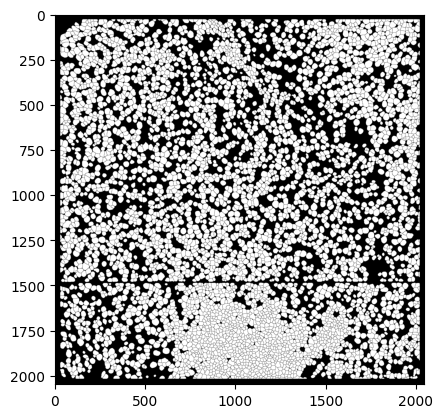

In [11]:
plt.imshow(mask, cmap='gray')
plt.show()

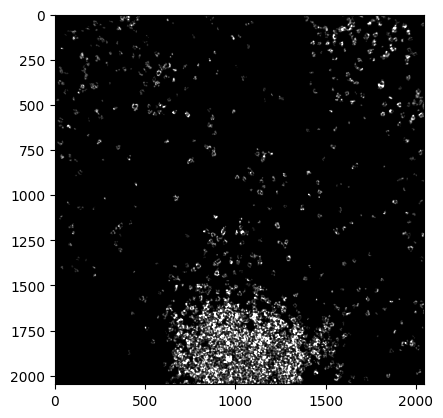

In [12]:
plt.imshow(image[8, :, :], cmap='gray', vmax=5)
plt.show()

Determine the name of each channel and the channel that needs to be removed to obtain the quantitative Anndata.

In [13]:
channel_names=[
    'Au','Background','Beta_catenin','Ca','CD11b','CD11c','CD138','CD16','CD20','CD209','CD3',
    'CD31','CD4','CD45','CD45RO','CD56','CD63','CD68','CD8','dsDNA','EGFR','Fe','FoxP3','H3K27me3',
    'H3K9ac','HLA-DR','HLA-I','IDO','CK17','CK6','Ki67','Lag3','MPO','Na','P','p53','PanCK','PD-L1',
    'PD-1','pS6','Si','SMA','Ta','Vimentin'
]

exp_removed = [0,1,3,19,21,23,33,34,40,42]

In [14]:
adata_img = sp.pp.read_mult_image2adata(
    image=image,
    mask=mask,
    channel_names=channel_names,
    remove_channels=exp_removed
)

In [15]:
adata_img

AnnData object with n_obs × n_vars = 5240 × 44
    uns: 'img', 'mask', 'var_for_analysis', 'spatial', 'SOAPy'
    obsm: 'spatial'